<h1> Arxiv Article Recommendation System <h1>

<img src='https://cdn.pixabay.com/photo/2020/04/03/21/52/home-office-5000280_1280.jpg' width= '800' align='center'>

<h2> To know that we know what we know, and to know that we do not know what we do not know, that is true knowledge. - Nicolaus Copernicus<h2>

In [1]:
#loading packages
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Loading the data from a Kaggle dataset <h2>

In [2]:
df = pd.read_json ('arxivData.json')
df.head()

,author,day,id,link,month,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


<h2> Exploratory Data Analysis <h2>

In [3]:
df.shape

(41000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   author   41000 non-null  object
 1   day      41000 non-null  int64 
 2   id       41000 non-null  object
 3   link     41000 non-null  object
 4   month    41000 non-null  int64 
 5   summary  41000 non-null  object
 6   tag      41000 non-null  object
 7   title    41000 non-null  object
 8   year     41000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


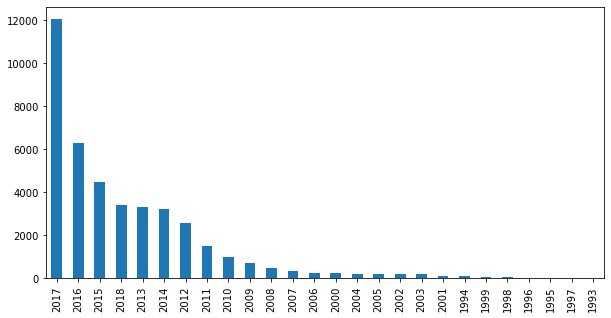

In [5]:
df['year'].value_counts().plot(x = 'year', y ='count', kind = 'bar', figsize = (10,5))

(-0.5, 2999.5, 1999.5, -0.5)

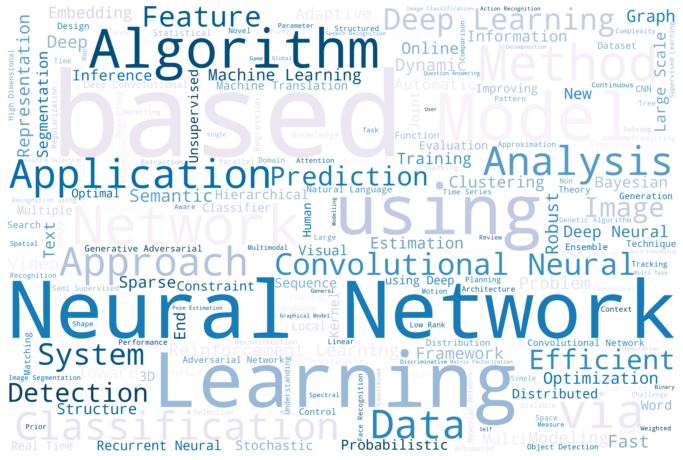

In [6]:
wordcloud = WordCloud(background_color='white', width=3000, height=2000, colormap='PuBu').generate(' '.join(df['title']))
plt.figure(figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

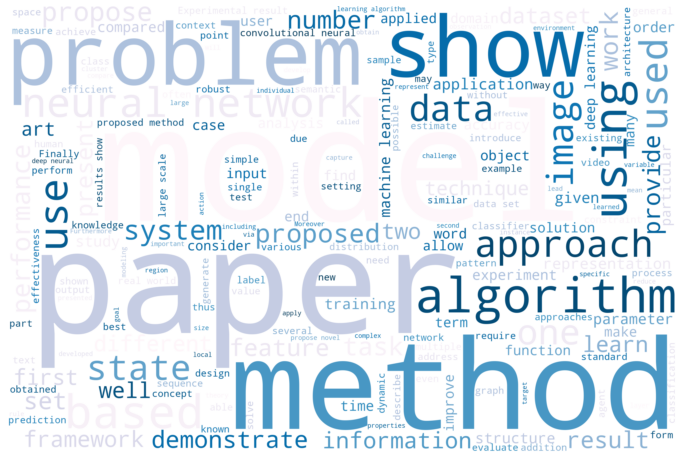

In [7]:
wordcloud = WordCloud(background_color='white', width=3000, height=2000, colormap='PuBu').generate(' '.join(df['summary']))
plt.figure(figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [8]:
# Printing the book title and description randomly
print(df['title'] [4321])
print(df['summary'][4321])

Sparsity Based Methods for Overparameterized Variational Problems
Two complementary approaches have been extensively used in signal and image
processing leading to novel results, the sparse representation methodology and
the variational strategy. Recently, a new sparsity based model has been
proposed, the cosparse analysis framework, which may potentially help in
bridging sparse approximation based methods to the traditional total-variation
minimization. Based on this, we introduce a sparsity based framework for
solving overparameterized variational problems. The latter has been used to
improve the estimation of optical flow and also for general denoising of
signals and images. However, the recovery of the space varying parameters
involved was not adequately addressed by traditional variational methods. We
first demonstrate the efficiency of the new framework for one dimensional
signals in recovering a piecewise linear and polynomial function. Then, we
illustrate how the new technique 

In [9]:
# Printing the book title and description randomly
print(df['title'] [1234])
print(df['summary'][1234])

Accelerating Deep Learning with Shrinkage and Recall
Deep Learning is a very powerful machine learning model. Deep Learning trains
a large number of parameters for multiple layers and is very slow when data is
in large scale and the architecture size is large. Inspired from the shrinking
technique used in accelerating computation of Support Vector Machines (SVM)
algorithm and screening technique used in LASSO, we propose a shrinking Deep
Learning with recall (sDLr) approach to speed up deep learning computation. We
experiment shrinking Deep Learning with recall (sDLr) using Deep Neural Network
(DNN), Deep Belief Network (DBN) and Convolution Neural Network (CNN) on 4 data
sets. Results show that the speedup using shrinking Deep Learning with recall
(sDLr) can reach more than 2.0 while still giving competitive classification
performance.


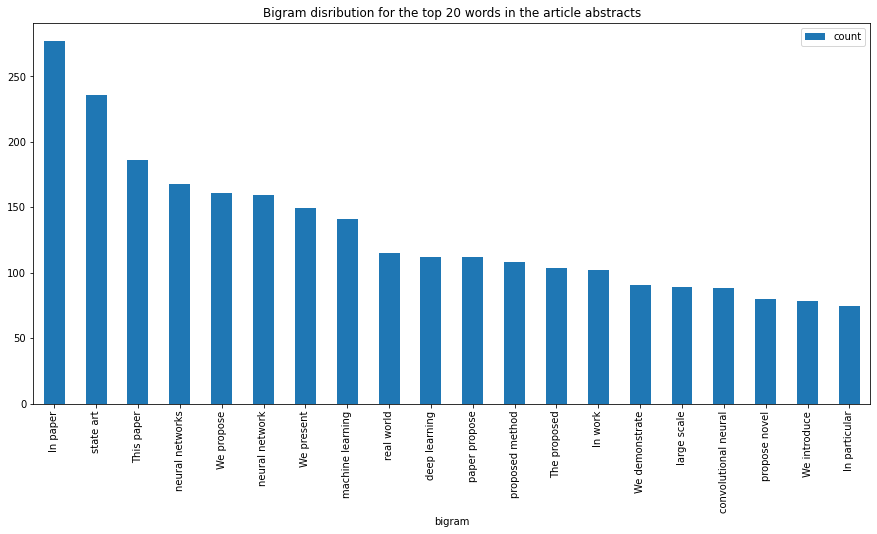

In [10]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['summary'])
total_words = tfidf_matrix.sum(axis=0) 
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
bigram = bigram.head(20)
bigram.plot(x ='bigram', y='count', kind = 'bar', title = 'Bigram disribution for the top 20 words in the article abstracts', figsize = (15,7), )

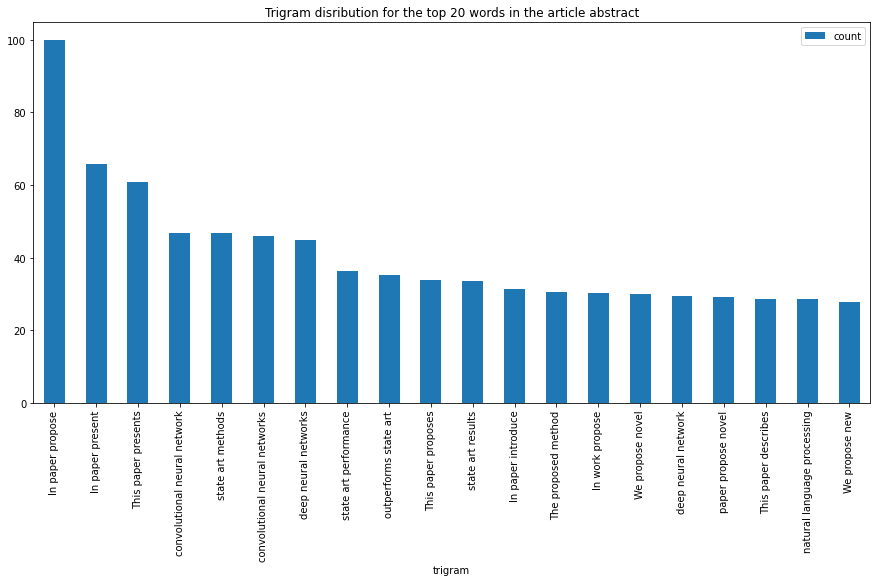

In [11]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['summary'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = 'Trigram disribution for the top 20 words in the article abstract', figsize = (15,7), )

<h2> Preprocessing <h2>

In [12]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return ''.join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = ' '.join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in title
df['cleanedt'] = df['title'].apply(_removeNonAscii)
df['cleanedt'] = df.cleanedt.apply(func = make_lower_case)
df['cleanedt'] = df.cleanedt.apply(func = remove_stop_words)
df['cleanedt'] = df.cleanedt.apply(func=remove_punctuation)
df['cleanedt'] = df.cleanedt.apply(func=remove_html)
df.head()

,author,day,id,link,month,summary,tag,title,year,cleanedt
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units visual question...
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016,sequential short text classification recurrent...
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks appl...
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017,learning share loosely related tasks
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017,deep reinforcement learning chatbot


In [13]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return ''.join(i for i in s if  ord(i)<128)
# Function for converting into lower case
def make_lower_case(text):
    return text.lower()
# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = ' '.join(text)
    return text
# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text
#Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
# Applying all the functions in description and storing 
df['cleanedd'] = df['summary'].apply(_removeNonAscii)
df['cleanedd'] = df.cleanedd.apply(func = make_lower_case)
df['cleanedd'] = df.cleanedd.apply(func = remove_stop_words)
df['cleanedd'] = df.cleanedd.apply(func=remove_punctuation)
df['cleanedd'] = df.cleanedd.apply(func=remove_html)
df.head()

,author,day,id,link,month,summary,tag,title,year,cleanedt,cleanedd
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units visual question...,propose architecture vqa utilizes recurrent la...
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016,sequential short text classification recurrent...,recent approaches based artificial neural netw...
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks appl...,introduce multiresolution recurrent neural net...
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017,learning share loosely related tasks,multi task learning motivated observation huma...
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017,deep reinforcement learning chatbot,present milabot deep reinforcement learning ch...


<h2> Recommendation engine by title <h2>

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
count = CountVectorizer()
count_matrix = count.fit_transform(df['cleanedt'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [15]:
indices = pd.Series(df['title'])
def recommend(title, cosine_sim = cosine_sim):
    recommended_articles = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_articles.append(list(df['title'])[i])
        
    return recommended_articles

In [16]:
by_title = recommend('Dual Recurrent Attention Units for Visual Question Answering')

In [17]:
from pandas import DataFrame
by_title = DataFrame (by_title,columns=['Recommendations By Title'])
by_title.index = pd.RangeIndex(start=1, stop=11, step=1)
pd.set_option('display.max_colwidth', None)
by_title

,Recommendations By Title
1,Visual Question Generation as Dual Task of Visual Question Answering
2,Attention on Attention: Architectures for Visual Question Answering\n (VQA)
3,A Focused Dynamic Attention Model for Visual Question Answering
4,High-Order Attention Models for Visual Question Answering
5,Task-driven Visual Saliency and Attention-based Visual Question\n Answering
6,Recurrent Models of Visual Attention
7,Question Answering and Question Generation as Dual Tasks
8,Exploring Human-like Attention Supervision in Visual Question Answering
9,Recurrent Neural Network Encoder with Attention for Community Question\n Answering
10,"Ask, Attend and Answer: Exploring Question-Guided Spatial Attention for\n Visual Question Answering"


<h2> Recommendation engine by abstract <h2>

In [18]:
count = CountVectorizer()
count_matrix = count.fit_transform(df['cleanedd'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [19]:
indices = pd.Series(df['title'])
def recommend(title, cosine_sim = cosine_sim):
    recommended_articles = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_articles.append(list(df['title'])[i])
        
    return recommended_articles

In [20]:
by_abstract = recommend('Dual Recurrent Attention Units for Visual Question Answering')

In [21]:
by_abstract = DataFrame (by_abstract,columns=['Recommendations By Abstract'])
by_abstract.index = pd.RangeIndex(start=1, stop=11, step=1)
pd.set_option('display.max_colwidth', None)
by_abstract

,Recommendations By Abstract
1,Visual Reference Resolution using Attention Memory for Visual Dialog
2,Exploring Human-like Attention Supervision in Visual Question Answering
3,Text-guided Attention Model for Image Captioning
4,Human Attention in Visual Question Answering: Do Humans and Deep\n Networks Look at the Same Regions?
5,Phase Conductor on Multi-layered Attentions for Machine Comprehension
6,Transparency by Design: Closing the Gap Between Performance and\n Interpretability in Visual Reasoning
7,Gaussian Attention Model and Its Application to Knowledge Base Embedding\n and Question Answering
8,Task-driven Visual Saliency and Attention-based Visual Question\n Answering
9,An Attention Mechanism for Answer Selection Using a Combined Global and\n Local View
10,Dual Attention Networks for Multimodal Reasoning and Matching


<h2> References: <h2>

1. https://towardsdatascience.com/building-a-content-based-book-recommendation-engine-9fd4d57a4dan
2. https://www.kdnuggets.com/2019/11/content-based-recommender-using-natural-language-processing-nlp.html